# Workshop 4, Financial Econometrics II

Full instructions can be found at: https://rpubs.com/cdorante/ec2004_w4

Ricardo Andrés Cáceres Villibord
A01706972

In [1]:
from google.colab import drive

drive.mount("/content/drive")
!pwd

Mounted at /content/drive
/content


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/DataScience/"
!ls

/content/drive/MyDrive/Colab Notebooks/DataScience
 auto-mpg1.data.txt  'Copy of Loading Data set.ipynb'		   iris.names
 auto-mpg.data	     'Copy of tutorial pandas extraction .ipynb'  'Módulo Estadística'
 auto-mpg.names       iaiqro.csv				   wine.data
 car.data	      Indicadores20231012114702.csv.xls		   wine.names
 CarMPG.ipynb	      iris.data


### Importar Librerias Necesarias

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import statsmodels.api as sm


In [4]:
df = pd.read_csv("Indicadores20231012114702.csv.xls")
df.head()

,Periodo,Indicadores
0,2003/01,65.234491
1,2003/02,64.750420
2,2003/03,61.444991
3,2003/04,64.953065
4,2003/05,59.522348


In [5]:
df = df.sort_values(by='Periodo')
df = df.reset_index(drop=True)
df.head(36)

,Periodo,Indicadores
0,2003/01,65.234491
1,2003/02,64.750420
2,2003/03,61.444991
3,2003/04,64.953065
4,2003/05,59.522348
5,2003/06,59.273040
6,2003/07,59.521204
7,2003/08,66.044043
8,2003/09,76.448073
9,2003/10,68.567827


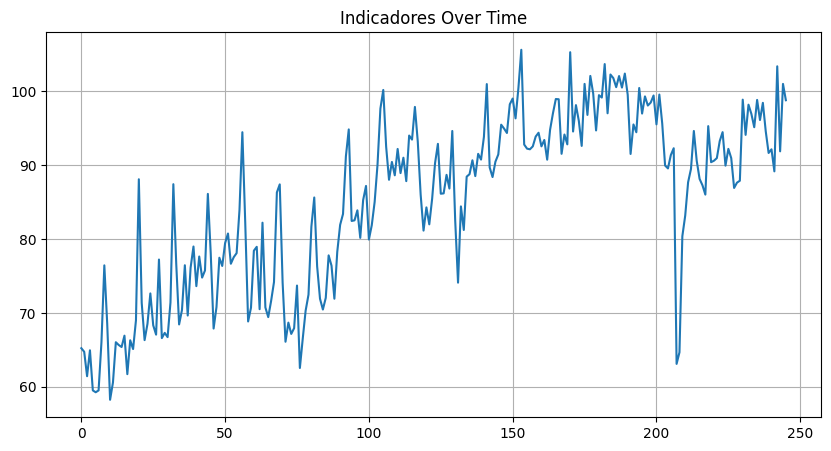

In [6]:
# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(df['Indicadores'], linestyle='-')
plt.title('Indicadores Over Time')
plt.grid(True)

# Show the plot

## Checamos la Statioinarity

In [7]:
df['log'] = np.log(df['Indicadores'])
df

,Periodo,Indicadores,log
0,2003/01,65.234491,4.177988
1,2003/02,64.750420,4.170540
2,2003/03,61.444991,4.118142
3,2003/04,64.953065,4.173665
4,2003/05,59.522348,4.086352
...,...,...,...
241,2023/02,89.168194,4.490524
242,2023/03,103.384331,4.638453
243,2023/04,91.876916,4.520450
244,2023/05,101.002534,4.615146


***Hacemos una prueba Dickey-Fuller aumentada (ADS) para determinar si la serie de tiempo es estacionaria o no. ***

In [8]:
from statsmodels.tsa.stattools import adfuller
dtest = adfuller(df['log'])
print(f"El ADF Statistic es {dtest[0]}")
if dtest[1] > 0.05:
  print(f"El p-value es {dtest[1]}, por lo tanto no es estacionaria")
else:
  print(f"El p-value es de {dtest[1]}, lo que significa que si es estacionaria")

El ADF Statistic es -2.0402700406367744
El p-value es 0.269199852269533, por lo tanto no es estacionaria


- If not stationary, then change the variable to the first difference of the log of the series, which is the % change for each period. Most of the economic and financial series become stationary with the first log difference.

In [9]:
df['Anual'] = df['log'] - np.log(df['Indicadores']).shift(12)
df

,Periodo,Indicadores,log,Anual
0,2003/01,65.234491,4.177988,NaN
1,2003/02,64.750420,4.170540,NaN
2,2003/03,61.444991,4.118142,NaN
3,2003/04,64.953065,4.173665,NaN
4,2003/05,59.522348,4.086352,NaN
...,...,...,...,...
241,2023/02,89.168194,4.490524,0.014323
242,2023/03,103.384331,4.638453,0.044631
243,2023/04,91.876916,4.520450,-0.023967
244,2023/05,101.002534,4.615146,0.028219


In [10]:
df = df.dropna()
df

,Periodo,Indicadores,log,Anual
12,2004/01,66.045678,4.190347,0.012358
13,2004/02,65.668412,4.184618,0.014078
14,2004/03,65.394662,4.180441,0.062298
15,2004/04,66.930978,4.203662,0.029997
16,2004/05,61.722965,4.122656,0.036304
...,...,...,...,...
241,2023/02,89.168194,4.490524,0.014323
242,2023/03,103.384331,4.638453,0.044631
243,2023/04,91.876916,4.520450,-0.023967
244,2023/05,101.002534,4.615146,0.028219


In [11]:
# Test the first difference for stationarity
dtest = adfuller(df['Anual'])
print(f"El ADF Statistic es {dtest[0]}")
if dtest[1] > 0.05:
  print(f"El p-value es {dtest[1]}, por lo tanto no es estacionaria")
else:
  print(f"El p-value es de {dtest[1]}, lo que significa que si es estacionaria")

El ADF Statistic es -3.399292659245505
El p-value es de 0.010983008452611525, lo que significa que si es estacionaria


- Run the ACF and PACF plots to identify the ARIMA-SARIMA parameters p, d, q, P, D, Q. The ACF is the auto-correlation plot, and the PACF is the partial autocorrelation plot. Both plots show auto*correlations between the variable and its own lags.

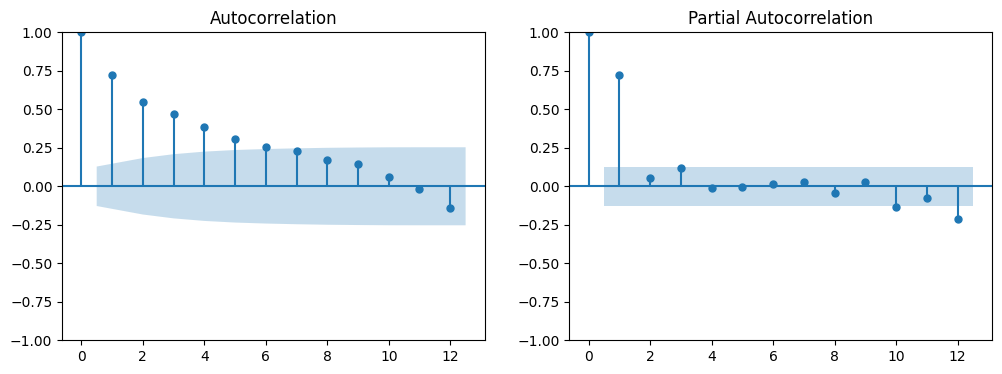

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for seasonal difference
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df.Anual, lags=12, ax=ax[0])
plot_pacf(df.Anual, lags=12, ax=ax[1])
plt.show()

***El Dfuller test nos dio un pvalue menor a 0.05, por lo tanto D=1; d=0 y p=1; q-0***


In [13]:
D=1
d=0
p=1
q=0

## SARIMA

In [14]:
P=0
Q=0

In [15]:
model_sarima = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima = model_sarima.fit(disp=0)
print(model_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 313.098
Date:                            Sun, 29 Oct 2023   AIC                           -620.195
Time:                                    15:32:39   BIC                           -609.987
Sample:                                         0   HQIC                          -616.074
                                            - 222                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.004      1.351      0.177      -0.002       0.013
ar.L1          0.7247      0.035   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Tras hacer el modelo, podemos observar como se hizo un modelo SARIMA con un componente autorregresivo (AR) de orden 1 y una diferencia no estacional de orden 0. Y un periodo estacional de 12 meses, porque estamos visualizando anualmente.

El coeficiente de ar.L1 nos dio 0.72 lo que significa una correlación positiva y que si es significativo. Mientreas que la varianza del error (sigma2) es de 0.0035.



- Run the ACF and PACF of the residuals/errors of the model to check whether the errors is a white noise series. In other words, if there is no significant autocorrelations of the errors.

In [22]:
residuals = model_sarima.resid
residuals

24     0.075945
25    -0.034591
26    -0.008793
27     0.119473
28    -0.033035
         ...   
241   -0.027391
242    0.028926
243   -0.061636
244    0.040264
245   -0.007009
Length: 222, dtype: float64

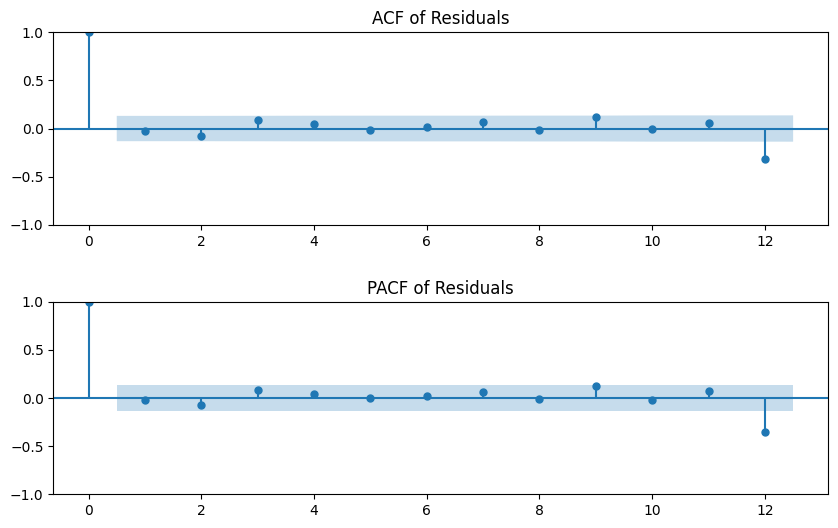

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals')
ax2.set_title('PACF of Residuals')
plt.show()

Podemos ver como el Lag 12 tiene una autocorrelación negativa significativa, es decir afuera de nuestro intervalo de confianza. Para esto podemos hacer el ajuste de pasar la Q = 1.

## SARIMA Versión Q=1

In [24]:
Q = 1
model_sarima2 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima2 = model_sarima2.fit(disp = 0)
print(model_sarima2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 337.579
Date:                              Sun, 29 Oct 2023   AIC                           -667.157
Time:                                      15:36:15   BIC                           -653.546
Sample:                                           0   HQIC                          -661.662
                                              - 222                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.002      2.294      0.022       0.001       0.007
ar.L1          0.77

Volvemos a correr el ACF and PACF de los residuales para ver si ahora si hay white noise

In [25]:
residuals2 = model_sarima2.resid
residuals2

24     0.077732
25    -0.036835
26    -0.008286
27     0.120938
28    -0.036422
         ...   
241   -0.033608
242    0.050399
243   -0.017796
244    0.066987
245   -0.031470
Length: 222, dtype: float64

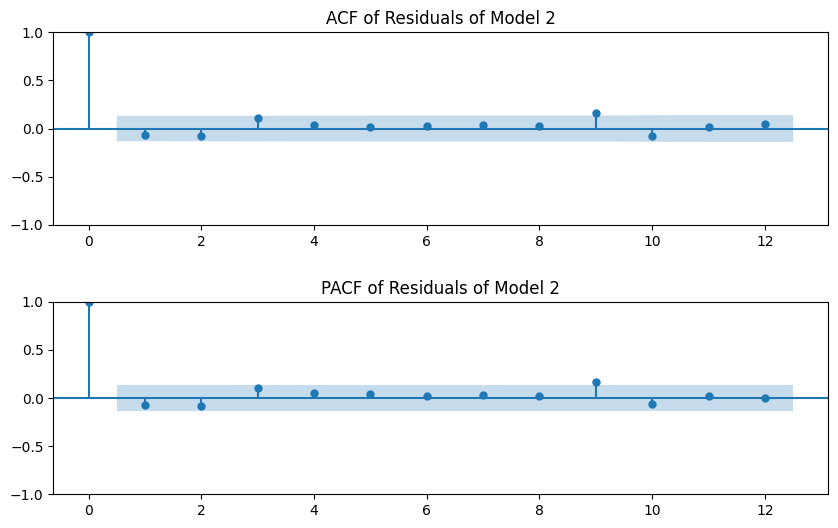

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals2, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals2, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals of Model 2')
ax2.set_title('PACF of Residuals of Model 2')
plt.show()

Como podemos ver, al cambiar el valor de Q a 1 en nuestro modelo, obtenemos los diagramads de autocorrelacion y autocorrelación parcial de los residuos y ahora podemos ver que el lag 12 ya se encuentra en el área de significancia.

También podemos explorar los resultados de cambiar la q a 1

## SARIMA Versión q = 1

In [27]:
q = 1
model_sarima3 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order=(P, D, Q, 12), trend='c',  simple_differencing=True)
model_sarima3 = model_sarima3.fit(disp = 0)
print(model_sarima3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  222
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 338.774
Date:                            Sun, 29 Oct 2023   AIC                           -667.549
Time:                                    15:44:57   BIC                           -650.535
Sample:                                         0   HQIC                          -660.680
                                            - 222                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0029      0.002      1.763      0.078      -0.000       0.006
ar.L1          0.8372      0.050   

En el modelo podemos observar los siguientes coeficientes:
El intercept es de 0.0029, lo que nos indica que la serie de tiempo tiende a estar alrededor de ese valor cuando se tienen en cuenta los otros componentes del modelo.

El coeficiente de autoregresivo de orden 1, el ar.L1, tiene un valor de 0.83 el cual nos dice que el valor actual de la serie de tiempo se relaciona de manera positia con el valor observado en el periodo anterior. Podemos decir que hay una fuerte dependencia de un período al siguiente.

El coeficiente de la media móvil, ma.L1, es de -0.1683, a pesar de ser un valor un poco bajo, este nos sugiere que el valor acutal de la serie de tiempo esta negativamente relacionado con los errores pasados, es de decir los residuos.

Ahora con este modelo podemos ver como ha ido mejorando desde nuestro primer modelo.
El modelo final tiene un mejor ajuste da los datos en función del Log Likelihood y el AIC más bajos. Como se ajusta mejor a nuestros datos, ahora intentaremos hacer predicciones con nuestro modelo.

In [28]:
residuals3 = model_sarima3.resid
residuals3

24     0.077439
25    -0.035665
26    -0.015232
27     0.118306
28    -0.024273
         ...   
241   -0.033938
242    0.047899
243   -0.010824
244    0.065405
245   -0.025569
Length: 222, dtype: float64

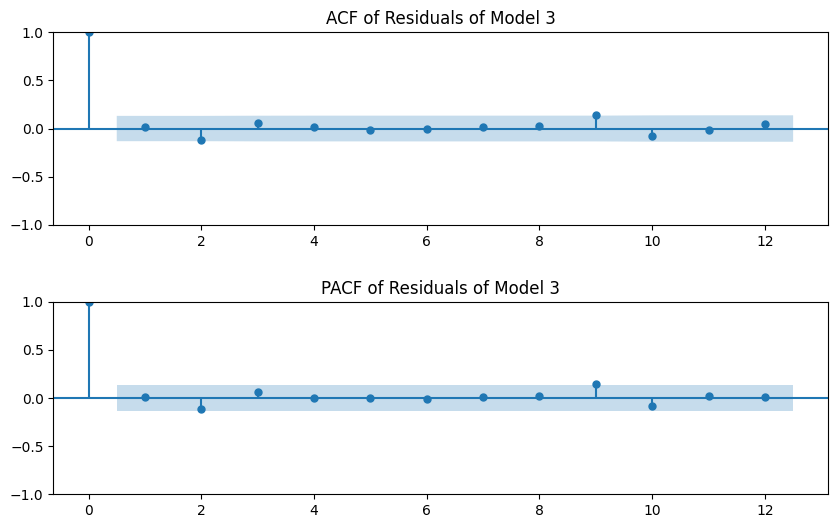

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals3, lags=12, ax=ax1)
fig.subplots_adjust(hspace=0.4)
sm.graphics.tsa.plot_pacf(residuals3, lags=12, ax=ax2)

ax1.set_title('ACF of Residuals of Model 3')
ax2.set_title('PACF of Residuals of Model 3')
plt.show()

En este tercer modelo podemos observar como no hay más variables significativas, entonces podríamos decir que llegamos a al white noise.

## Predicciones

In [38]:
modelo_final = sm.tsa.statespace.SARIMAX(df['Indicadores'], order=(p,d,q), seasonal_order = (P,D,Q,12),  trend='c')
modelo_final_summ = modelo_final.fit()
y = modelo_final_summ.predict(start=0, end=(len(df)+25))

In [39]:
df = df[['Indicadores', 'Periodo']]
df

,Indicadores,Periodo
0,66.045678,2004/01
1,65.668412,2004/02
2,65.394662,2004/03
3,66.930978,2004/04
4,61.722965,2004/05
...,...,...
254,NaN,2025/03
255,NaN,2025/04
256,NaN,2025/05
257,NaN,2025/06


In [40]:
df = df.append(pd.Series([math.nan,'2023/07'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/08'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/09'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/10'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/11'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/12'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/01'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/02'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/03'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/04'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/05'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/06'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/07'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/08'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/09'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/10'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/11'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/12'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/01'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/02'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/03'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/04'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/05'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/06'], index=['Indicadores','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2025/07'], index=['Indicadores','Periodo']), ignore_index=True)

<ipython-input-40-463b455139f2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/07'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-40-463b455139f2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/08'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-40-463b455139f2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([math.nan,'2023/09'], index=['Indicadores','Periodo']), ignore_index=True)
<ipython-input-40-463b455139f2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Se

In [42]:
df['Predict'] = y
df = df.reset_index(drop = True)
df = df.set_index(['Periodo'], drop=True)

## Predicción Historíca


<Axes: xlabel='Periodo'>

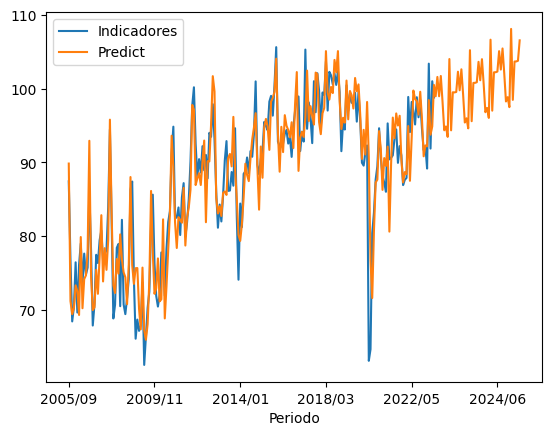

In [46]:
df.iloc[20:].plot()

## Predicción a Cierre de Sexenio

<Axes: xlabel='Periodo'>

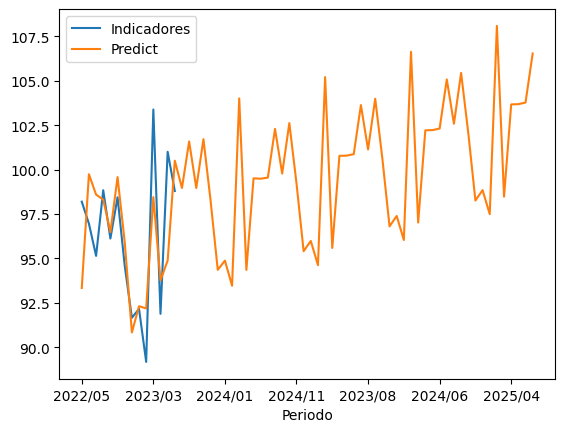

In [52]:
df.iloc[220:].plot()

## Predicciones

In [58]:
df.iloc[228:]

,Indicadores,Predict
Periodo,,
2023/01,92.152168,92.304043
2023/02,89.168194,92.180379
2023/03,103.384331,98.448843
2023/04,91.876916,93.759848
2023/05,101.002534,94.877195
2023/06,98.793566,100.498930
2023/07,NaN,98.965240
2023/08,NaN,101.583400
2023/09,NaN,98.963901


Podemos observar como se obtuvo un pronóstica de la economía. Se observa una tendencia creciente y que en el ultimo mes tiende a caer un poco.